# Distribution of Compustat observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrds

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


------

### Download funda from Compustat

In [3]:
df= conn.raw_sql(f"""select conm, gvkey, fyear, at, sale, ni, sich
                    from comp.funda a
                    where a.fyear >= 1990 and 
                        a.fyear <= 2020 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C'
                    """)
print(df.shape)

(352623, 7)


In [4]:
df=df.dropna()
df= df.sort_values(['gvkey','fyear'])
df['fyear']= df['fyear'].astype(int)
df= df.reset_index(drop=True)
print(df.shape)
df.head()

(252762, 7)


,conm,gvkey,fyear,at,sale,ni,sich
0,AAR CORP,001004,1990,379.958,466.542,14.801,5080.0
1,AAR CORP,001004,1991,395.351,422.657,10.020,5080.0
2,AAR CORP,001004,1992,365.151,382.780,0.283,5080.0
3,AAR CORP,001004,1993,417.626,407.754,9.494,5080.0
4,AAR CORP,001004,1994,425.814,451.395,10.463,5080.0


In [5]:
# excluding financial firms
df= df[~( (df.sich>=6000)&(df.sich<7000) )]
df.shape

(210233, 7)

In [6]:
df['neg_ni']= (df.ni <= 0).astype(int)
df.head()

,conm,gvkey,fyear,at,sale,ni,sich,neg_ni
0,AAR CORP,001004,1990,379.958,466.542,14.801,5080.0,0
1,AAR CORP,001004,1991,395.351,422.657,10.020,5080.0,0
2,AAR CORP,001004,1992,365.151,382.780,0.283,5080.0,0
3,AAR CORP,001004,1993,417.626,407.754,9.494,5080.0,0
4,AAR CORP,001004,1994,425.814,451.395,10.463,5080.0,0


-----------
## Visualization not using agg() method

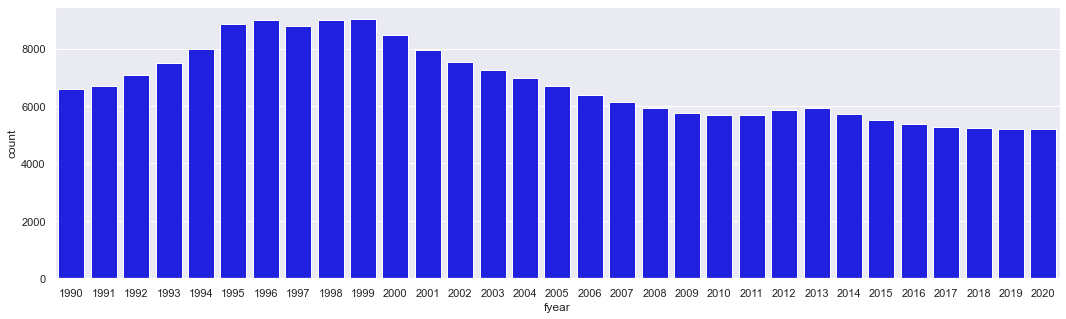

In [7]:
sns.set(rc={'figure.figsize':(18,5)})
sns.countplot(data= df, x= 'fyear', color= 'blue')
plt.show()

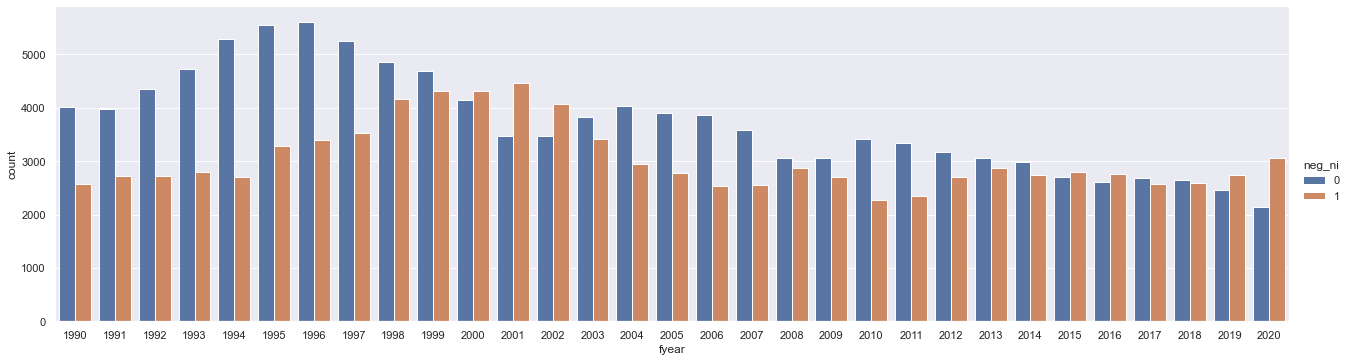

In [8]:
sns.catplot(data= df, x="fyear", kind="count", height=5, aspect=18/5, hue= 'neg_ni')
plt.show()

-----------